In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('1995_96 - 2020 Premier league standings.csv')

In [6]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020


In [7]:
# create goal difference column
df['GD'] = df['GF'] - df['GA']

In [8]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020,-13
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020,-26
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020,-25
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020,-28


In [10]:
# fazer a regressão

# definir y e x variables

# dependent variable (y) - rank
y = df.Rk

# independent variable (x) - GD
# temos de fazer este extra por ser uma data frame
x = df.GD.values.reshape(-1,1)

print(x.shape,y.shape)

(500, 1) (500,)


In [13]:
# criar nova model instance
model = LinearRegression().fit(x,y)

# ver como se portou
r_sq = model.score(x,y)
print(r_sq)

0.8384102509297338


Text(0.5, 1.0, 'Evaluating the Relationship between GD and Rank')

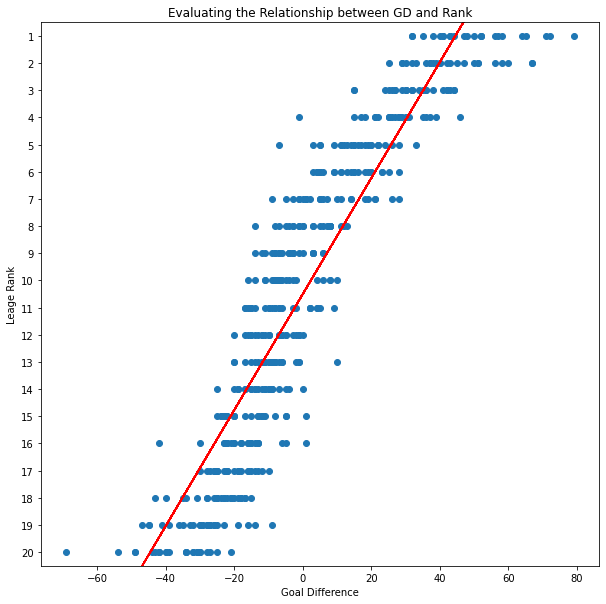

In [25]:
#pegar intercept e slope
intercept = model.intercept_
slope = model.coef_ # de coeficiente

#criar linha de regressão
y_pred = intercept + slope*x

# plot the graph
fix, ax = plt.subplots(figsize=(10,10))

# criar um scatterplot
plt.scatter(x,y)

# adicionar linha
plt.plot(x,y_pred,c='red')

#definir limites
plt.ylim(0.5,20.5)

# definir ticks
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

# inverter eixo yy
plt.gca().invert_yaxis()

plt.xlabel('Goal Difference')
plt.ylabel('Leage Rank')
plt.title('Evaluating the Relationship between GD and Rank')